In [1]:
import pandas as pd
import sqlite3 
conn=sqlite3.connect("factbook.db")
q="select tbl_name from sqlite_master"
pd.read_sql_query(q,conn)

,tbl_name
0,sqlite_sequence
1,facts


In [2]:
q="select * from facts limit 5"
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [3]:
q="select min(population),max(population), min(population_growth),max(population_growth) from facts"
pd.read_sql_query(q,conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [4]:
q="select name from facts where population==0 "
pd.read_sql_query(q,conn)

,name
0,Antarctica


In [6]:
q="select * from facts where population== (select max(population) from facts)"
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


The maximum poulation of 7.2 nillion people refers to the world name which is the total population of all the countries. Also, for antarctica apparently there is no one living there truely

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa225c39e80>,
      dtype=object)

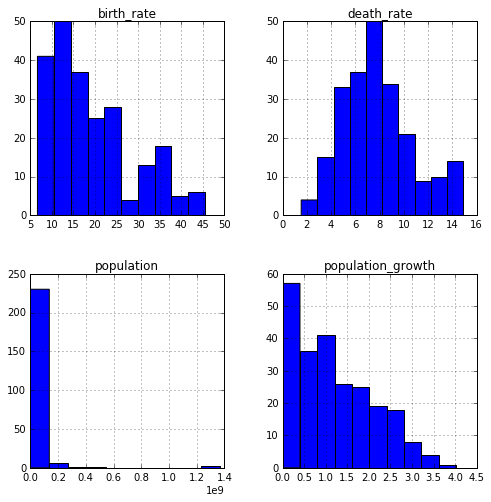

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
q=" select population, population_growth,birth_rate,death_rate from facts where population != (select max(population) from facts) and population!=(select min(population) from facts)"
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
pd.read_sql_query(q,conn).hist(ax=ax)
